# Breast Cancer Detection

The goal of this exercice is to use neural networks architectures and terminology.  
We are about to build, train and evaluate our neural networks.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.utils import plot_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2024-03-18 15:28:47.223415: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Préambule : Playground architecture 

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*v3kJ0xqpTlhVS-UM8idFog.png" style="display: block; margin-left: auto; margin-right: auto;" width="600" height="450" alt="description">


In [4]:
# Create a new sequential model with a list of layers
model_playground = Sequential([
    
    InputLayer(input_shape=(2,)),
    Dense(5, activation='relu'),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_playground.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


* Display the neural network architecture.

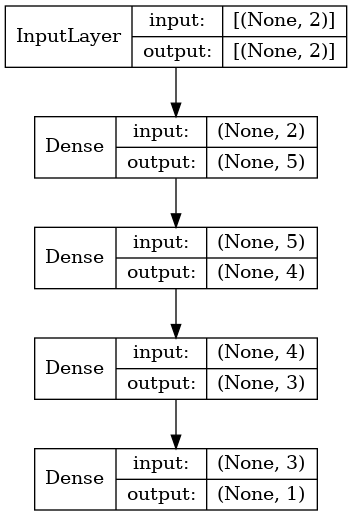

In [6]:
# Display your neural network architecture with plot_model() and save it as model.png
plot_model(model_playground, to_file='model.png', show_shapes=True, show_layer_names=False)

* Recalculate manually the number of parameters for each layer and compare with the summary.
* Give the general formula for calculating any dense layer's parameters.
* Deduce the total number of parameters in the model.

In [8]:
# Calculate the number of parameters in the model for each layer
# First hidden layer
hidden1_params = 5*(2 + 1)

hidden2_params = 4*(5+1)

hidden3_params = 3*(4+1)

output_params = 1*(3 + 1)

# Total number of parameters
total_params = hidden1_params + hidden2_params + hidden3_params + output_params


print(f'Hidden layer 1 parameters: {hidden1_params}')
print(f'Hidden layer 2 parameters: {hidden2_params}')
print(f'Hidden layer 3 parameters: {hidden3_params}')
print(f'Output layer parameters: {output_params}')
# print total number of parameters
print(f'Total parameters: {total_params}')

# Give the general formula for the number of parameters in a dense layer
# The number of parameters in a dense layer is given by: (n + 1) * m,
# where n is the number of inputs (features for the first layer, number of units
# from the previous layer for the subsequent layers)
# m is the number of units (neurons).
# The additional 1 comes from the bias term.

Hidden layer 1 parameters: 15
Hidden layer 2 parameters: 24
Hidden layer 3 parameters: 15
Output layer parameters: 4
Total parameters: 58


## 1.2 Fitting neural network model 🔮

### 1.2.1 Load and prepare the data

<img src="https://api.time.com/wp-content/uploads/2019/02/cancer-diagnosis.jpg" style="display: block; margin-left: auto; margin-right: auto;" width="450" height="450" alt="description">


* Load the breast cancer dataset from `sklearn.datasets` and split it into training and testing sets using `train_test_split`. 
* Use 80% of the data for training and 20% for testing. Set the random_state to 0 for reproducibility.
* Scale your features with your favorite method.

In [10]:
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 1.2.2 Define the model

* Create a sequential model with 2 hidden layers (16, 8 units) and an output layer.


In [12]:
from tensorflow import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(input_shape):
    model = Sequential([
        Dense(16, activation='relu', input_shape=input_shape),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize the model
model = build_model((X_train_scaled.shape[1],))


### 1.2.3 Compile the model

* Compile the model with the loss and the optimizer of your choice.
* Choose the metric to score your model.

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### 1.2.4 Train the model

Train the model with:
* 100 epochs,
* a validation set of 20%,
* a batch size of 10, a verbose = 2,
* ans save the training history in a variable called `history`.

In [16]:
model = build_model((X_train_scaled.shape[1],))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1, shuffle=False)

Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 0.5221 - accuracy: 0.7775 - val_loss: 0.3460 - val_accuracy: 0.8571
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3003 - accuracy: 0.9176 - val_loss: 0.2427 - val_accuracy: 0.9231
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9451 - val_loss: 0.1922 - val_accuracy: 0.9451
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9615 - val_loss: 0.1627 - val_accuracy: 0.9560
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9643 - val_loss: 0.1447 - val_accuracy: 0.9670
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.9753 - val_loss: 0.1334 - val_accuracy: 0.9670
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9780 - val_loss: 0.1254 - val_accuracy: 0.9670
Epoch 8/100
3

### 1.2.5 Evaluate the model

* Evaluate your model based on your metrics.
* Display your confusion matrix.
* Plot the loss and the score vs the nb of epochs, for the train set and the validation set.   
Would you say your model performs well? What would you do?

In [18]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

4/4 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9912
Test Accuracy: 99.12%


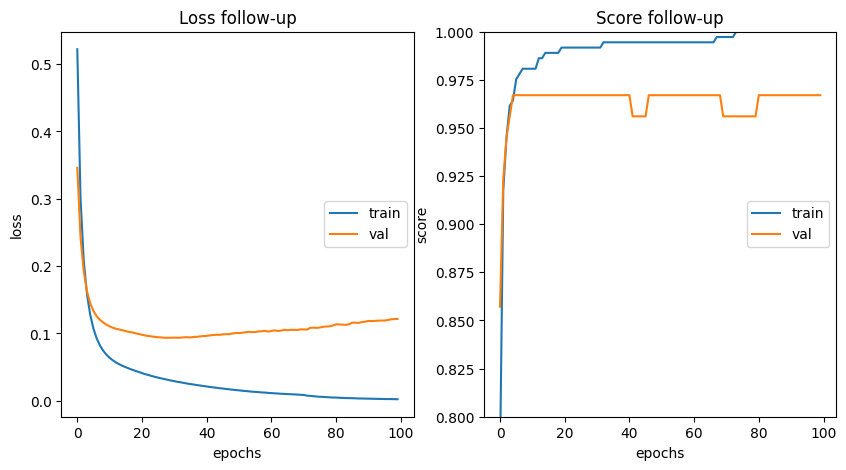

In [19]:
def loss_score_follow_up_during_fitting(history):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Loss follow-up')
    ax[0].set_ylabel('loss')
    ax[0].set_xlabel('epochs')
    ax[0].legend(['train', 'val'], loc='right')

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Score follow-up')
    ax[1].set_ylabel('score')
    ax[1].set_xlabel('epochs')
    ax[1].legend(['train', 'val'], loc='right')
    ax[1].set_ylim([0.8,1])

loss_score_follow_up_during_fitting(history)

4/4 [==============================] - 0s 1ms/step


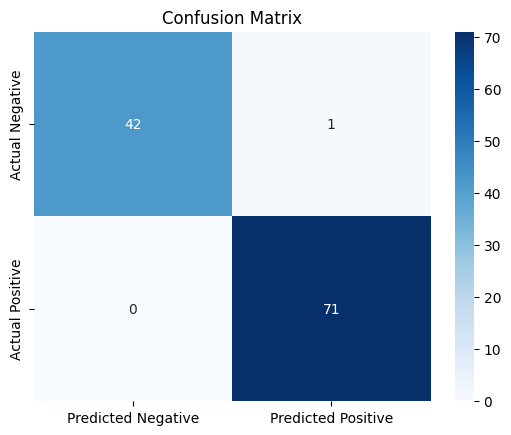

In [20]:
#build a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
def confusion_matrix_plot(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.show()

y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred)
confusion_matrix_plot(y_test, y_pred)
